# Global Warming affects on Agriculture - India

Global Warming and Agriculture are the two of the many things which always excites me, and I'm always curious about it. So why not collab both under the same roof.

Global Warming can be the next biggest global crisis after the current COVID-19 pendamic. It has been affecting the agriculture around the world and will more in future. So in this data analysis we'll analyze - how does the global warming affects the agriculture.

## Contents

- How to run the code
- Data Preparation and Cleaning
- Exploratory Analysis and Visualization
- Asking and Answering Questions
- Inferences and Conclusion
- References and Futher readings

## How to run the code

This is an executable [Jupyter notebook](https://jupyter.org) hosted on [Jovian.ml](https://jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: using free online resources (recommended) or on your own computer.


### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.

### Option 2: Running on your computer locally

1. Install Conda by following these instructions. Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.


2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade

```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id

```

4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook

```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.

## Data Preparation and Cleaning 

Lets now, talk a little about data prepartions and cleaning. For this analysis I've used various datasets from  kaggle. The main focus of the dataset is to analyze and visualize the impact on agriculture of global warming.

I've used to different datasets - one for global temperatures and other for the indian crop production datasets. After preparing the datasets at the end this topic I got made data frames `india_temp_df` and `india_crop_production_df` and saved it as and `.csv` file.

#### Activities Performed

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [1]:
import os
os.listdir()

['india-temp.csv',
 'india-crop-production.csv',
 '.ipynb_checkpoints',
 'cropProduction',
 '.jovianrc',
 'cropProduction.zip',
 'global-temperatures.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalLandTemperaturesByState.csv.zip',
 'global warming affects on agriculture India.ipynb']

In [2]:
import pandas as pd

In [3]:
global_temp_by_state_raw_df = pd.read_csv('GlobalLandTemperaturesByState.csv')
global_temp_by_state_raw_df.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
484983,1922-02-01,-39.834,1.531,Sakha,Russia
444741,1992-02-01,25.617,0.752,Pernambuco,Brazil
67554,1914-12-01,-3.029,0.335,Bryansk,Russia
162907,1938-02-01,-1.449,1.495,Himachal Pradesh,India
288604,1886-03-01,-5.188,0.500,Maine,United States


In [4]:
global_temp_by_state_raw_df.columns.tolist()

['dt',
 'AverageTemperature',
 'AverageTemperatureUncertainty',
 'State',
 'Country']

In [5]:
india_temp_raw_df = global_temp_by_state_raw_df[global_temp_by_state_raw_df.Country == 'India' ].copy()

In [6]:
india_temp_raw_df.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
514731,1919-02-01,-4.483,0.841,Sikkim,India
162365,1892-12-01,0.320,1.060,Himachal Pradesh,India
464655,1938-04-01,30.281,0.314,Rajasthan,India
588210,1963-07-01,21.398,0.328,Uttaranchal,India
29223,1954-06-01,30.765,0.364,Andhra Pradesh,India


In [7]:
selected_cols = ['dt',
 'AverageTemperature','State']

india_temp_df = india_temp_raw_df[selected_cols].copy()

india_temp_df.sample(7)

,dt,AverageTemperature,State
152611,1968-04-01,27.314,Haryana
310677,1891-12-01,18.070,Meghalaya
346111,1857-08-01,25.090,Nagaland
311915,1995-02-01,18.814,Meghalaya
231787,1836-10-01,25.453,Kerala
612564,1797-04-01,27.003,West Bengal
464913,1959-10-01,27.628,Rajasthan


In [8]:
india_temp_df.shape

(86664, 3)

### Working with Dates

Now, if you check the date series(column) `dt` data type is shows object. Now the reason for this is pandas assign the `object` datatype to the unidentified one's. so for better analysis we should convert it's datatype to `datetime` dtype.

To do that, we can use the pandas `pd.to_datetime` method.

In [9]:
india_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86664 entries, 24709 to 615161
Data columns (total 3 columns):
dt                    86664 non-null object
AverageTemperature    81620 non-null float64
State                 86664 non-null object
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [10]:
#converting the date dtype to date time
india_temp_df['dt'] = pd.to_datetime(india_temp_df['dt'])

In [11]:
india_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86664 entries, 24709 to 615161
Data columns (total 3 columns):
dt                    86664 non-null datetime64[ns]
AverageTemperature    81620 non-null float64
State                 86664 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.6+ MB


We'll it seems like everythig worked well. So let's save this dataframe as a `.csv` file.

In [12]:
# saving the data frame

india_temp_df.to_csv('india-temp.csv')

In [13]:
os.listdir()

['india-temp.csv',
 'india-crop-production.csv',
 '.ipynb_checkpoints',
 'cropProduction',
 '.jovianrc',
 'cropProduction.zip',
 'global-temperatures.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalLandTemperaturesByState.csv.zip',
 'global warming affects on agriculture India.ipynb']

In [14]:
os.listdir('cropProduction')

['datafile (2).csv',
 'datafile (3).csv',
 'datafile.csv',
 'datafile (1).csv',
 'produce.csv']

In [15]:
raw_df_1 = pd.read_csv('cropProduction/datafile.csv')
raw_df_1.sample(5)

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
10,Fibers,100.0,92.0,91.0,96.0,109.0,107.0,138.0,140.0


In [16]:
raw_df_2 = pd.read_csv('cropProduction/datafile (2).csv')
raw_df_2.sample(5)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
46,Garlic,226.2,311.3,242.1,243.0,308.2,187.6,241.6,195.8,194.4,236.8,120.6,128.8,123.6,125.0,130.1
52,Banana,189.3,201.1,298.8,301.7,339.4,117.6,131.2,174.8,189.8,204.6,161.0,153.3,171.0,159.0,165.9
11,Gram,140.6,127.6,156.5,165.9,182.5,122.3,123.1,128.8,133.3,149.9,115.0,103.7,121.7,124.5,121.7
38,Total Spices,1427.7,1571.5,1463.0,1430.3,1790.6,121.3,125.9,126.5,122.0,136.6,1176.6,1247.7,1156.8,1172.1,1310.8
39,Black pepper,134.2,91.5,92.2,99.2,101.1,130.8,104.7,126.9,104.2,97.8,102.6,87.4,72.7,95.2,103.4


In [17]:
raw_df_3 = pd.read_csv('cropProduction/datafile (3).csv')
raw_df_3.sample(5)

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
15,Wheat,WHD 943,NaN,"Punjab, Haryana, Delhi, Rajasthan (except Kota...",NaN
31,Pearl Millet,RHB 177 (MH 1486),NaN,"Rajasthan, Haryana and Gujarat under rainfed l...",NaN
33,Finger Millet,GPU 67,119,"Chhattisgarh, Jharkhand, Karnataka, Maharashtr...",NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",NaN
53,Fieldpea,Dantiwada Fieldpea 1 (SKNP 04-09),NaN,"Eastern Uttar Pradesh, Bihar, Jharkhand and We...",NaN


In [18]:
raw_df_1 = pd.read_csv('cropProduction/datafile (1).csv')
raw_df_1.sample(5)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
21,MAIZE,Karnataka,13792.85,20671.54,581.69,31.10
32,PADDY,West Bengal,24731.06,33046.12,731.25,39.04
12,GRAM,Uttar Pradesh,12833.04,21618.43,1882.68,10.93
15,GROUNDNUT,Karnataka,13647.10,17314.20,3484.01,4.71
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69


In [19]:
raw_df_1.columns.tolist()

['Crop',
 'State',
 'Cost of Cultivation (`/Hectare) A2+FL',
 'Cost of Cultivation (`/Hectare) C2',
 'Cost of Production (`/Quintal) C2',
 'Yield (Quintal/ Hectare) ']

In [20]:
# Selecting the required columns and making a new data frame 'crop_prod_sel_df'
sel_cols = ['Crop',
 'State']

crop_prod_sel_df = raw_df_1[sel_cols].copy()

crop_prod_sel_df.sample(5)

,Crop,State
13,GRAM,Maharashtra
17,GROUNDNUT,Tamil Nadu
27,MOONG,Karnataka
9,COTTON,Haryana
12,GRAM,Uttar Pradesh


In [21]:
crop_prod_sel_df.shape

(49, 2)

In [22]:
raw_df_4 = pd.read_csv('cropProduction/produce.csv')
raw_df_4.sample(3)

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
18,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.36212,26.7367,25.6100,31.8946,28.5442,23.833320,33.081849,32.436072,29.79,31.2432
133,Agriculture Production Foodgrains Production F...,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.40000,2.3800,2.3900,2.5700,2.5500,2.570000,2.600000,2.660000,NaN,NaN
46,Agricultural Production Commercial Crops Cotton,"Annual, Ending mar Of Each Year",Bale mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.42860,18.4990,22.6318,25.8841,22.2762,24.021803,33.000000,35.200000,34.22,36.5000


In [23]:
crop_prod_sel_df.Crop.sample(5)

38    RAPESEED AND MUSTARD
11                    GRAM
33                   PADDY
34                   PADDY
6                   COTTON
Name: Crop, dtype: object

In [24]:
# So, if look at the Crop names, it is in uppercase so turning then it into lower case
crop_prod_sel_df['Crop'] = crop_prod_sel_df.Crop.str.capitalize()

In [25]:
crop_prod_sel_df.sample(5)

,Crop,State
28,Moong,Andhra Pradesh
48,Wheat,Rajasthan
25,Moong,Orissa
9,Cotton,Haryana
32,Paddy,West Bengal


Once we are done with the captilizing the columns, we'll merge the df with the `raw_df_2` on `Crop`.

In [26]:
raw_df_2.sample(5)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
35,Tea,132.2,132.8,132.0,132.0,132.0,135.3,137.8,137.8,137.8,137.8,97.7,96.3,95.8,95.8,95.8
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
45,Coriander,126.4,167.9,131.3,128.5,261.3,79.1,94.8,97.9,88.8,130.7,159.8,177.2,134.1,144.7,199.9
39,Black pepper,134.2,91.5,92.2,99.2,101.1,130.8,104.7,126.9,104.2,97.8,102.6,87.4,72.7,95.2,103.4
36,Coffee,138.0,139.8,139.9,154.5,161.1,117.9,119.8,121.9,123.7,125.4,117.0,116.7,114.8,125.0,128.5


In [27]:

raw_df_2.columns.tolist()

['Crop             ',
 'Production 2006-07',
 'Production 2007-08',
 'Production 2008-09',
 'Production 2009-10',
 'Production 2010-11',
 'Area 2006-07',
 'Area 2007-08',
 'Area 2008-09',
 'Area 2009-10',
 'Area 2010-11',
 'Yield 2006-07',
 'Yield 2007-08',
 'Yield 2008-09',
 'Yield 2009-10',
 'Yield 2010-11']

In [28]:
# Lets select the required columns

req_cols = ['Crop             ',
 'Production 2006-07',
 'Production 2007-08',
 'Production 2008-09',
 'Production 2009-10',
 'Production 2010-11',]

india_crop_production_raw_df = raw_df_2[req_cols].copy()

india_crop_production_raw_df.sample(5)


,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11
45,Coriander,126.4,167.9,131.3,128.5,261.3
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9
17,Groundnut,115.2,217.5,169.8,128.6,195.7
11,Gram,140.6,127.6,156.5,165.9,182.5
4,Bajra,136.4,161.5,143.9,105.4,167.9


So this is the data frame with which we want to combine the `State` column. But before merging let's fix small error like extra spaces in the columns. 

In [29]:
india_crop_production_raw_df = india_crop_production_raw_df.rename(columns={'Crop             ' : 'Crop'})

In [30]:
india_crop_production_raw_df.columns.tolist()

['Crop',
 'Production 2006-07',
 'Production 2007-08',
 'Production 2008-09',
 'Production 2009-10',
 'Production 2010-11']

In [31]:
crop_prod_sel_df.sample(5)

,Crop,State
35,Rapeseed and mustard,Madhya Pradesh
7,Cotton,Andhra Pradesh
26,Moong,Rajasthan
0,Arhar,Uttar Pradesh
27,Moong,Karnataka


In [32]:
india_crop_production_raw_df.sample(5)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11
39,Black pepper,134.2,91.5,92.2,99.2,101.1
18,Sesamum,95.5,116.8,98.8,90.8,137.9
1,Rice,200.8,207.9,213.3,191.6,206.4
8,Barley,88.1,79.3,112.0,89.9,110.3
23,Niger seed,65.1,59.0,63.0,53.8,58.0


In [33]:
# merging the data frame 

india_crop_production_df = india_crop_production_raw_df.merge(crop_prod_sel_df, on="Crop")

In [34]:
india_crop_production_df.sample(5)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,State
19,Groundnut,115.2,217.5,169.8,128.6,195.7,Karnataka
27,Sugarcane,149.8,146.7,120.1,123.2,144.3,Maharashtra
24,Sugarcane,149.8,146.7,120.1,123.2,144.3,Uttar Pradesh
10,Gram,140.6,127.6,156.5,165.9,182.5,Madhya Pradesh
18,Arhar,97.0,128.9,94.9,103.3,119.9,Maharashtra


In [35]:
# saving the data frame

india_crop_production_df.to_csv('india-crop-production.csv')

Let us save and upload our work to Jovian before continuing

In [36]:
!pip install jovian --upgrade --quiet

In [37]:
import jovian
jovian.commit(files=['india-crop-production.csv', 'india-temp.csv'])

<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization


Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [85]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (15, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Understanding the Average Temperature Data of Different States

By looking at the graph we get an idea about the average temperatures at different states. Sikkim and Jammu and Kashmir have the most coolest temperature, whereas Delhi and Rajasthan have the most hottest temperature.

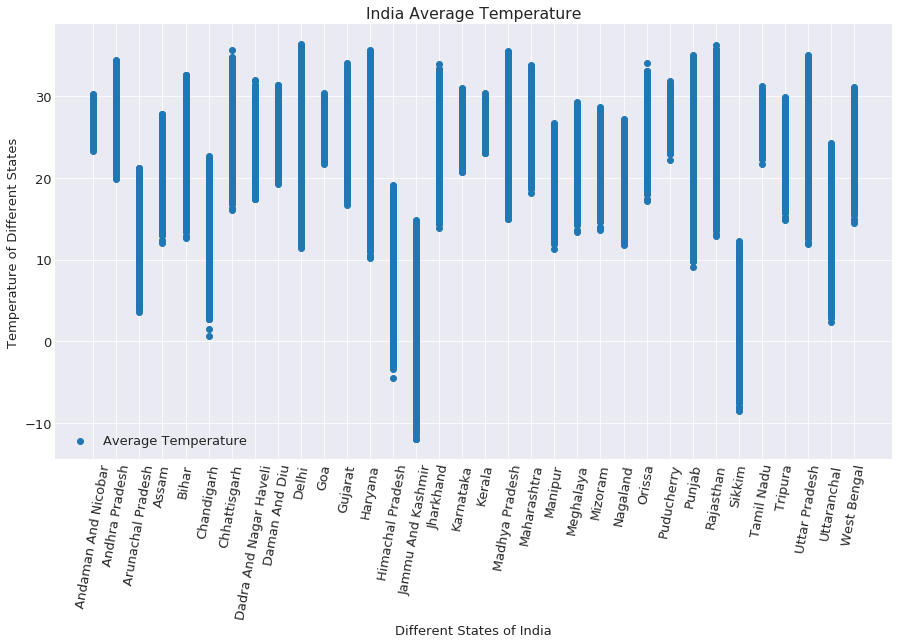

In [63]:
# ploting the average-temperature graph with respect to its states

plt.scatter(india_temp_df.State, india_temp_df.AverageTemperature);
plt.xticks(rotation=80);

plt.title('India Average Temperature')
plt.legend(['Average Temperature'])

plt.xlabel('Different States of India')
plt.ylabel('Temperature of Different States');

### Exploring the Crops Production Data of Different States

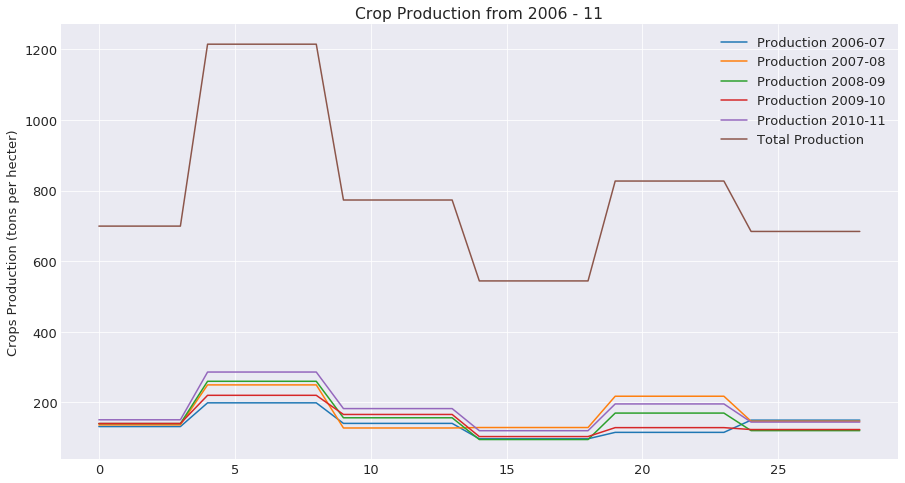

In [64]:
# Plotting a graph for the crop production from 2006 to 2011

india_crop_production_df.plot();
plt.title('Crop Production from 2006 - 11');

plt.ylabel('Crops Production (tons per hecter)');

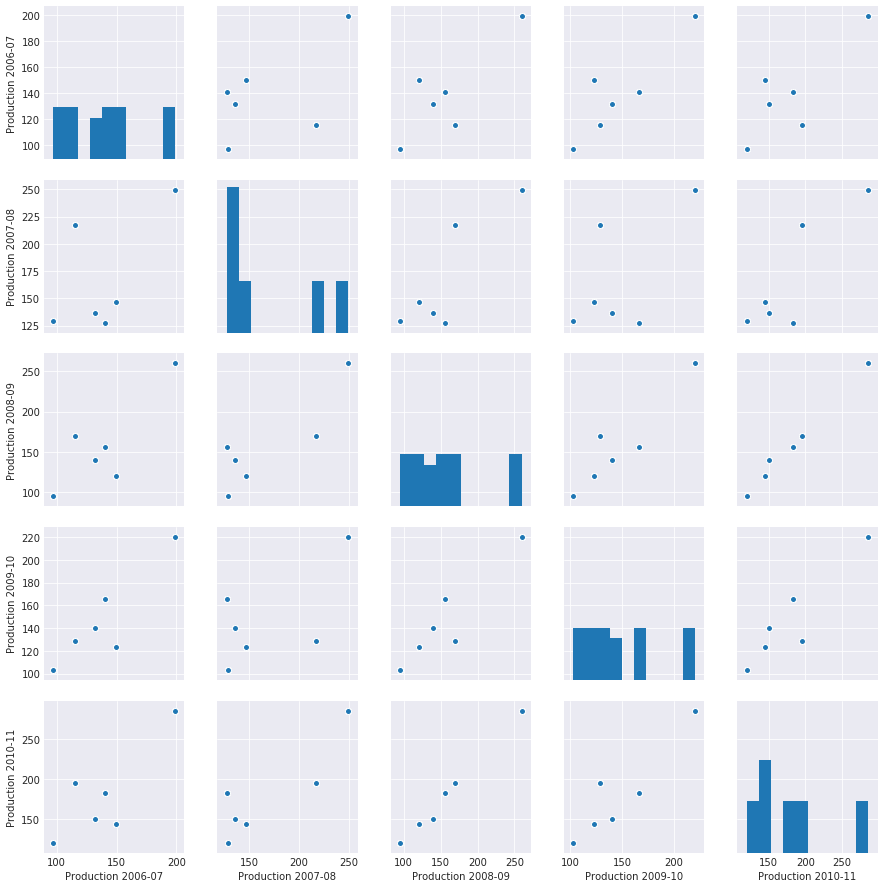

In [41]:
# To understand the complete dataset- pair plot is the best

sns.pairplot(india_crop_production_df);

## Asking and Answering Questions

We've already gained some insights about our datasets - `india_temp_df` and `india_crop_prod_df`. we have seen which are the most warm and coldest states of india, simply by plotting the line graph using the `matplotlib` python library. So now let's try to answer some interesting questions.


### Q1: Which are the states and what the different crops grown?

To answer this question we'll use the `.unique()` method to display the list of different crops and states.

>`.unique()` --  While analyzing the data, many times the user wants to see the unique values in a particular column, which can be done using Pandas unique() function.

In [42]:
#list of states
dif_states = india_crop_production_df['State'].unique().tolist()

dif_states

['Madhya Pradesh',
 'Punjab',
 'Uttar Pradesh',
 'Rajasthan',
 'Bihar',
 'Karnataka',
 'Andhra Pradesh',
 'Maharashtra',
 'Gujarat',
 'Tamil Nadu']

In [43]:
# list of crops
dif_crops = india_crop_production_df['Crop'].unique().tolist()

dif_crops

['Wheat', 'Maize', 'Gram', 'Arhar', 'Groundnut', 'Sugarcane']

### Q2: Which is the most and the least produced crops?

To understand this questions, well have to create a new columns `Total Production` which will store the sum of all the production of particular crop from 2006 to 2011, and after that we can easily we can answer the question. Using the `.nlargest()` and `.nsmallest()` pandas method. We can also use the `.sort_values` method.


> `.sort_values` -- Sort by the values along either axis. `ascending` parameter : bool or list of bool, default True Sort ascending vs. descending. Specify list for multiple sort orders.  If this is a list of bools, must match the length of the by.
     
     
> `.nlargest()` -- Get the rows of a DataFrame sorted by the `n` largest values of `columns`.



In [44]:
india_crop_production_df['Total Production'] = india_crop_production_df.sum(axis=1)

In [45]:
india_crop_production_df.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,State,Total Production
0,Wheat,131.6,136.4,140.1,140.3,150.8,Madhya Pradesh,699.2
1,Wheat,131.6,136.4,140.1,140.3,150.8,Punjab,699.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,Uttar Pradesh,699.2
3,Wheat,131.6,136.4,140.1,140.3,150.8,Rajasthan,699.2
4,Maize,198.8,249.6,259.8,220.1,286.0,Bihar,1214.3


In [46]:
india_crop_production_df['Total Production'].nlargest(1)

4    1214.3
Name: Total Production, dtype: float64

In [47]:
# Sorting the most grown crops using the .sort_values method

india_crop_production_df.sort_values('Total Production',ascending = False).head(1)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,State,Total Production
4,Maize,198.8,249.6,259.8,220.1,286.0,Bihar,1214.3


In [48]:
# Sorting the least grown crops using the .sort_values method

india_crop_production_df.sort_values('Total Production',ascending = True).head(1)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,State,Total Production
14,Arhar,97.0,128.9,94.9,103.3,119.9,Uttar Pradesh,544.0


In [49]:
crops_total_production = india_crop_production_df['Total Production'].unique()

crops_total_production

array([ 699.2, 1214.3,  773.1,  544. ,  826.8,  684.1])

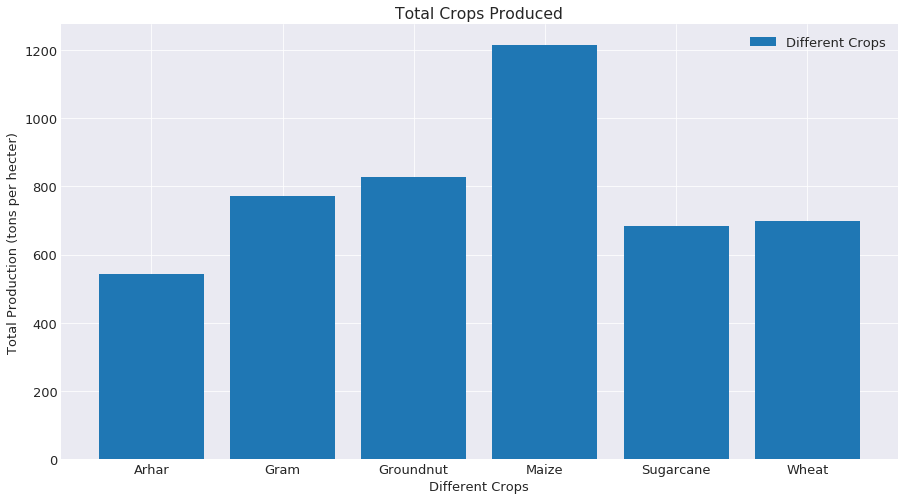

In [65]:
# plotting the bar for the most and the least grown crop

plt.bar(dif_crops, crops_total_production);
plt.title('Total Crops Produced');

plt.xlabel('Different Crops');
plt.ylabel('Total Production (tons per hecter)');
plt.legend(['Different Crops']);

So, now by looking at the visual picture of all the crops grown, we can conclude/ answer the question, saying Arhar is the least grown crop and Maize is the most grown crop.

### Merging the data frames

Merging the `india_temp_df` to `india_crop_production_df` on `States` using the pandas `.merge()` function/method. 

> `.merge()` -- Merge DataFrame objects by performing a database-style join operation by columns or indexes. If joining columns on columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on.

In [51]:
# merging both the data frames

main_df = india_temp_df.merge(india_crop_production_df, on="State")

In [52]:
main_df.sample(5)

,dt,AverageTemperature,State,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Total Production
73844,1985-07-01,29.099,Uttar Pradesh,Sugarcane,149.8,146.7,120.1,123.2,144.3,684.1
47488,1854-01-01,11.875,Punjab,Wheat,131.6,136.4,140.1,140.3,150.8,699.2
47462,1851-11-01,17.312,Punjab,Wheat,131.6,136.4,140.1,140.3,150.8,699.2
29701,1979-04-01,30.119,Karnataka,Arhar,97.0,128.9,94.9,103.3,119.9,544.0
60822,1945-02-01,26.052,Tamil Nadu,Groundnut,115.2,217.5,169.8,128.6,195.7,826.8


### Q3: Which states produces the most and least crops?

To answer this question, we'll create a seprate dataframe using the pandas `.groupby` method.

> `.groupby` -- Group series using mapper (dict or key function, apply given function to group, return result as series) or by a series of columns.

In [53]:
crops_by_states = india_crop_production_df.groupby(['State']).size().to_frame()

# crops_by_states.sort_values('State')

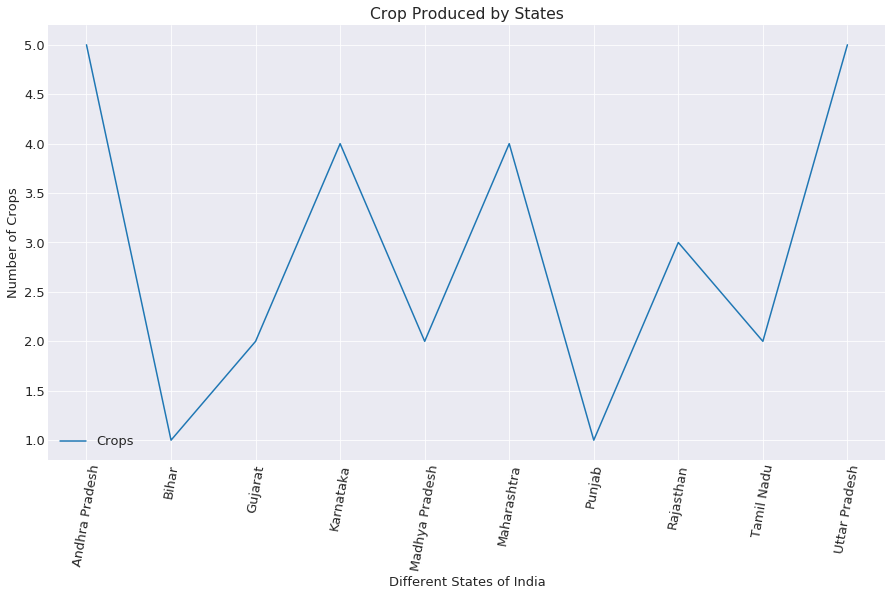

In [66]:
# plotting the simple line graph

plt.plot(crops_by_states);
plt.xticks(rotation=80);

plt.title('Crop Produced by States')
plt.legend(['Crops'])

plt.xlabel('Different States of India')
plt.ylabel('Number of Crops');

After looking at the graph we get an idea about the most and the least crops producing states. Most producing states are - Andhra Pradesh and Uttar Pradesh and the least producing states Bihar and Punjab.

## Q4: Which are the states that produces Arhar and Maize?

Now by looking at the data frame and graph, we get our answer. Andhra Pradesh, Bihar, Karnataka, Rajasthan, Uttar Pradesh, Gujrat and Maharastra are the states which produces Arhar and Maize.

If we look at the graph properly we see states like Andhra Pradesh, Uttar Pradesh, and Karanataka are the states which produces both arhar and maize, where states like Bihar, Gujrat and Maharastra only produces one crop.

In [55]:
india_crop_production_df.sample(5)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,State,Total Production
16,Arhar,97.0,128.9,94.9,103.3,119.9,Gujarat,544.0
4,Maize,198.8,249.6,259.8,220.1,286.0,Bihar,1214.3
5,Maize,198.8,249.6,259.8,220.1,286.0,Karnataka,1214.3
20,Groundnut,115.2,217.5,169.8,128.6,195.7,Andhra Pradesh,826.8
8,Maize,198.8,249.6,259.8,220.1,286.0,Andhra Pradesh,1214.3


In [56]:
maize = india_crop_production_df[india_crop_production_df['Crop'] == "Maize"]

arhar = india_crop_production_df[india_crop_production_df['Crop'] == "Arhar"]

arhar

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,State,Total Production
14,Arhar,97.0,128.9,94.9,103.3,119.9,Uttar Pradesh,544.0
15,Arhar,97.0,128.9,94.9,103.3,119.9,Karnataka,544.0
16,Arhar,97.0,128.9,94.9,103.3,119.9,Gujarat,544.0
17,Arhar,97.0,128.9,94.9,103.3,119.9,Andhra Pradesh,544.0
18,Arhar,97.0,128.9,94.9,103.3,119.9,Maharashtra,544.0


In [57]:
maize

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,State,Total Production
4,Maize,198.8,249.6,259.8,220.1,286.0,Bihar,1214.3
5,Maize,198.8,249.6,259.8,220.1,286.0,Karnataka,1214.3
6,Maize,198.8,249.6,259.8,220.1,286.0,Rajasthan,1214.3
7,Maize,198.8,249.6,259.8,220.1,286.0,Uttar Pradesh,1214.3
8,Maize,198.8,249.6,259.8,220.1,286.0,Andhra Pradesh,1214.3


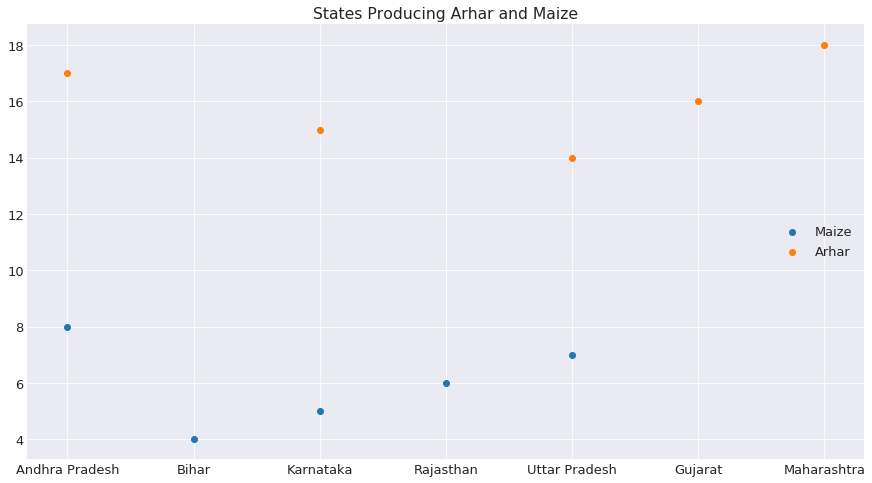

In [67]:
plt.scatter(maize.State, maize.index);
plt.scatter(arhar.State, arhar.index);

plt.title("States Producing Arhar and Maize" );
plt.legend(['Maize', 'Arhar'], loc=7);

So, with this we've completed answer questions about agriculture dataset. Now we'll be analysing our this results with the average India temperatures. above we've also created a dataframe `main_df` which was the combination of both the temperature and agriculture dataframe.

### Q5: How temp affects crops

In [59]:
india_temp_df.sample(4)

,dt,AverageTemperature,State
615143,2012-03-01,26.228,West Bengal
537157,1872-01-01,23.779,Tamil Nadu
225174,1966-07-01,25.378,Karnataka
113709,1818-06-01,33.772,Delhi


In [60]:
sel_states_df = india_temp_df[(india_temp_df['State'] == "Bihar") | 
                           (india_temp_df['State'] == "Karnataka") |
                           (india_temp_df['State'] == "Andhra Pradesh") |
                           (india_temp_df['State'] == "Gujarat") |
                           (india_temp_df['State'] == "Maharashtra") |
                           (india_temp_df['State'] == "Rajasthan") |
                           (india_temp_df['State'] == "Uttar Pradesh")
                          ] 

sel_states_df.shape

(18291, 3)

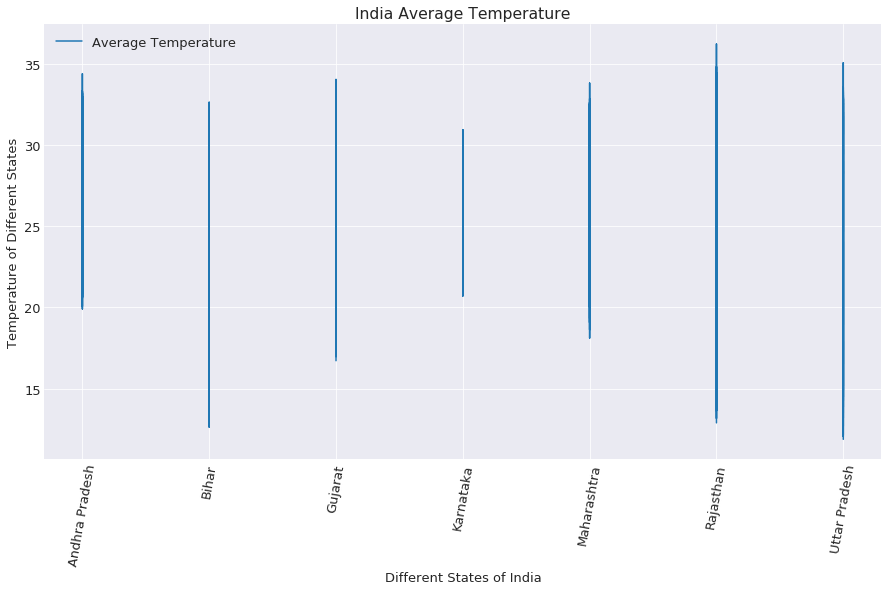

In [92]:
plt.plot(sel_states_df.State, sel_states_df.AverageTemperature);
plt.xticks(rotation=80);

plt.title('India Average Temperature')
plt.legend(['Average Temperature'])

plt.xlabel('Different States of India')
plt.ylabel('Temperature of Different States');

In [78]:
# Most and least crop producing states

ml_states_df = india_temp_df[(india_temp_df['State'] == "Bihar") | 
                           (india_temp_df['State'] == "Andhra Pradesh") |
                           (india_temp_df['State'] == "Punjab") |
                           (india_temp_df['State'] == "Uttar Pradesh")
                          ] 

ml_states_df.head()

,dt,AverageTemperature,State
27322,1796-01-01,22.796,Andhra Pradesh
27323,1796-02-01,25.020,Andhra Pradesh
27324,1796-03-01,27.480,Andhra Pradesh
27325,1796-04-01,30.901,Andhra Pradesh
27326,1796-05-01,32.519,Andhra Pradesh


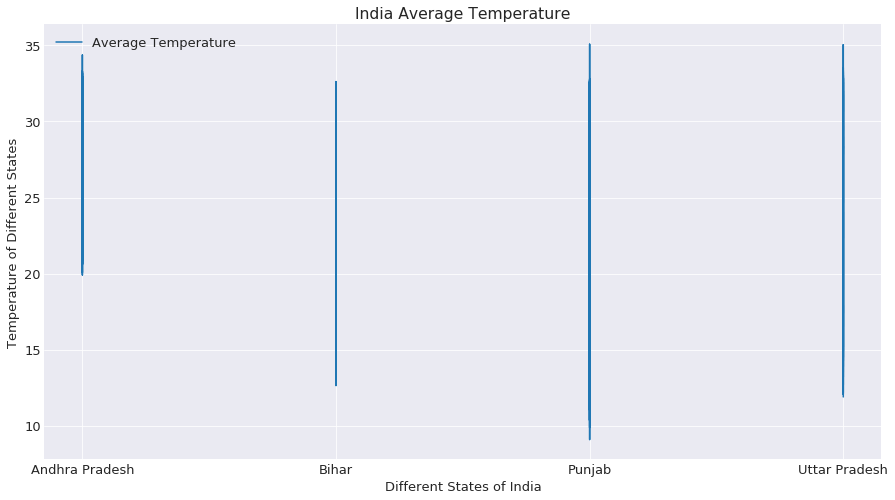

In [93]:
plt.plot(ml_states_df.State, ml_states_df.AverageTemperature);

plt.title('India Average Temperature')
plt.legend(['Average Temperature'])

plt.xlabel('Different States of India')
plt.ylabel('Temperature of Different States');

we saw a graph which show, states having cold temperature are not good at producing more crops, place having warm - intermediate temperatures grows good agriculture.

## Inferences and Conclusions

At the end of this analysis we get an and conclusion about how the global warming is affecting on agriculture.

- So we started with finding the list of different states and crops.


- At very first we analysed the temperature dataset, and we found that coldest and the hotest states of India, which are Sikkim, Jammu and Kashmir and Hotest states are Delhi and Rajasthan.


- We analysed agriculture data, and found the most and the least grown crops, which was - Maize and Arhar. 


- After that we looked the states which produced the most and the least crops, and then looked at the states which produces Arhar and Maize -- which was Uttar Pradesh, and Andhra pradesh and Least- Bihar and Punjab


- We also used the temparature data to analyse how data tempearature affects the crops.  


- we saw a graph which show, states having cold temperature are not good at producing more crops, place having warm - intermediate temperatures grows good agriculture.



## References and Futher readings

These are some of the links, which I found useful.

* [We are prepared for the Next Global Crisis](https://www.sachinshrmaa.com/health/we-are-not-ready-for-the-next-global-crisis/) post on my blog.

* [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) on kaggle

* [Pandas Guide](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) Pandas documentation



Lets save and upload our work at jovian

In [95]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sachinshrmaa/global-warming-affects-on-agriculture-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/sachinshrmaa/global-warming-affects-on-agriculture-india


'https://jovian.ml/sachinshrmaa/global-warming-affects-on-agriculture-india'